# 02 Experiments with scaling

In this document we continue our investigation of disjoint generative model. In paticular, we inspect the behaviour of the model when we do multiple splits beyond the original 2 splits. We compare to the efficiency of the original model and check the privacy and utility parameters under repeted rounds of experiments.

Most of the results used to create the figures were made using the script found in: 

```experiments/auxiliaries/parallel_time_utility_privacy_exp.py```

This script runs the experiment in parallel and saves the results in a file. The results are then loaded and used to create the figures.

Because the Diabetic Mellitus dataset requires higher patience for the model for it to create a dataset of comparable size, we run the experiment separately here, and manually added the rows in the csv file. This also serves as an example for the reader to run the experiment on their own.

In [ ]:
### Running the experiment for the diabetes mellitus dataset
# Compared to the other datasets, the joining validator is more impatient so we set the patience to 1 (minimum)
# The multiplier is set to 6 to give more chances for valid joins to be found

import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from disjoint_generative_model.utils.joining_validator import JoiningValidator
from disjoint_generative_model.utils.joining_strategies import UsingJoiningValidator

from experiments.auxiliaries.parallel_time_utility_privacy_exp import data_for_time_privacy_and_utility_figure

model = ['synthpop', 'datasynthesizer', 'ctgan']

train_data = {
    'dm':pd.read_csv('experiments/datasets/diabetic_mellitus_train.csv'),
    }

test_data = {
    'dm':pd.read_csv('experiments/datasets/diabetic_mellitus_test.csv'),
    }

target_vars = {
    'dm':'TYPE',
    }

Rf = RandomForestClassifier(n_estimators=100)
JS = UsingJoiningValidator(JoiningValidator(Rf), patience=1)

res = data_for_time_privacy_and_utility_figure(model, 5, JS, train_data, test_data, target_vars, multiplier=6)

res.to_csv(f'experiments/results/time_privacy_utility_{model}_diabetes.csv', index=False)

In [ ]:
### Generate figures for the paper

import os
import time
import pandas as pd

from typing import Dict
from pandas import DataFrame

from disjoint_generative_model import DisjointGenerativeModels

from disjoint_generative_model.utils.joining_strategies import JoinStrategy
from disjoint_generative_model.utils.generative_model_adapters import generate_synthetic_data

from syntheval import SynthEval

# metrics = {
#     "corr_diff" : {"mixed_corr": True},
#     "auroc_diff" : {"model": "rf_cls"},
#     "cls_acc"   : {"F1_type": "macro"},
#     "eps_risk"  : {},
#     "mia_risk"  : {"num_eval_iter": 5},
# }

# def data_for_time_privacy_and_utility_figure(
#     model: str,
#     num_repetitions: int,
#     dgms_strategy: JoinStrategy,
#     train_data: Dict[str, DataFrame],
#     test_data: Dict[str, DataFrame],
#     target_vars: Dict[str, str]) -> DataFrame:
#     """ Generate the data for one model of training times, utility and privacy metrics """

#     steps = [2,3,4]

#     results_df = pd.DataFrame(columns=['model','data','step','rep_idx','time'])

#     # do baselines first
#     for data_name, data_df in train_data.items():
#         syn_data = {}
#         for i in range(num_repetitions):
#             start = time.time()
#             df_syn = generate_synthetic_data(data_df, model)
#             end = time.time()

#             syn_data[data_name+'0'+'r'+str(i)] = df_syn
            
#             results_df.loc[len(results_df)] = {'model': model, 'data':data_name, 'step': 1, 'rep_idx':i,'time':end-start}
            
#             for step in steps:
#                 start = time.time()
#                 dgms_strategy.max_size = len(data_df)
#                 dgms = DisjointGenerativeModels(data_df, step*[model], joining_strategy = dgms_strategy)
#                 dgms.join_multiplier = 6
#                 df_dgms = dgms.fit_generate()
#                 end = time.time()

#                 print("Size of synthetic data: ", df_dgms.shape)

#                 syn_data[data_name+str(step)+'r'+str(i)] = df_dgms
#                 results_df.loc[len(results_df)] = {'model': model, 'data':data_name, 'step': step, 'rep_idx':i, 'time':end-start}

#         SE = SynthEval(data_df, test_data[data_name], verbose=False)
#         res, _ = SE.benchmark(syn_data, analysis_target_var=target_vars[data_name], **metrics, rank_strategy='summation')

#         results_df.loc[results_df['data']==data_name, 'corr_mat_diff'] = res['corr_mat_diff']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'auroc'] = res['auroc']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'cls_F1_diff'] = res['cls_F1_diff']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'cls_F1_diff_hout'] = res['cls_F1_diff_hout']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'eps_identif_risk'] = res['eps_identif_risk']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'priv_loss_eps'] = res['priv_loss_eps']['value'].tolist()
#         results_df.loc[results_df['data']==data_name, 'mia_cls_risk'] = res['mia_cls_risk']['value'].tolist()

#         results_df.loc[results_df['data']==data_name, 'utility'] = res['u_rank'].tolist()
#         results_df.loc[results_df['data']==data_name, 'privacy'] = res['p_rank'].tolist()

#     for filePath in os.listdir():
#         if "SE_" in filePath:
#             os.remove(filePath)
            
#     return results_df

In [9]:
### Running the experiment for each model (change model manually)
from sklearn.ensemble import RandomForestClassifier

from disjoint_generative_model.utils.joining_validator import JoiningValidator
from disjoint_generative_model.utils.joining_strategies import UsingJoiningValidator

model = 'datasynthesizer'

train_data = {
    # 'bc':pd.read_csv('experiments/datasets/breast_cancer_train.csv'), 
    # 'cc':pd.read_csv('experiments/datasets/cervical_cancer_train.csv'),
    # 'de':pd.read_csv('experiments/datasets/derm_train.csv'),
    'dm':pd.read_csv('experiments/datasets/diabetic_mellitus_train.csv'),
    # 'kd':pd.read_csv('experiments/datasets/kidney_disease_train.csv'),
    # 'st':pd.read_csv('experiments/datasets/stroke_train.csv'),
    }

test_data = {
    # 'bc':pd.read_csv('experiments/datasets/breast_cancer_test.csv'), 
    # 'cc':pd.read_csv('experiments/datasets/cervical_cancer_test.csv'),
    # 'de':pd.read_csv('experiments/datasets/derm_test.csv'),
    'dm':pd.read_csv('experiments/datasets/diabetic_mellitus_test.csv'),
    # 'kd':pd.read_csv('experiments/datasets/kidney_disease_test.csv'),
    # 'st':pd.read_csv('experiments/datasets/stroke_test.csv'),
    }

target_vars = {
    # 'bc':'Status', 
    # 'cc':'Biopsy',
    # 'de':'b_class',
    'dm':'TYPE',
    # 'kd':'class',
    # 'st':'stroke',
    }

Rf = RandomForestClassifier(n_estimators=100)
JS = UsingJoiningValidator(JoiningValidator(Rf), patience=1)

res = data_for_time_privacy_and_utility_figure(model, 5, JS, train_data, test_data, target_vars)

res.to_csv(f'experiments/results/time_privacy_utility_{model}_diabetes.csv', index=False)

================ Constructing Bayesian Network (BN) ================
Adding ROOT NSA_2
Adding attribute NSA_3
Adding attribute WGT
Adding attribute BMI
Adding attribute AGE
Adding attribute GLU
Adding attribute DBP
Adding attribute OCP
Adding attribute LOE
Adding attribute RSB
Adding attribute TYPE
Adding attribute HBP
Adding attribute WTL_2
Adding attribute SWT
Adding attribute HNG
Adding attribute SEX
Adding attribute WTL
Adding attribute BRV
Adding attribute LOA_2
Adding attribute LOA
Adding attribute SBF
Adding attribute DIT
Adding attribute WKN
Adding attribute MST
Adding attribute WLG
Adding attribute LCR
Adding attribute WKN_3
Adding attribute EXT_2
Adding attribute EXT
Adding attribute DZN
Adding attribute FLS
Adding attribute VDS
Adding attribute STP
Adding attribute HDC
Adding attribute FAW
Adding attribute FTG_4
Adding attribute NRV
Adding attribute FTG_2
Adding attribute FTG_3
Adding attribute TLF
Adding attribute FHB
Adding attribute WKN_2
Adding attribute IIU
Adding attri

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 34, 'split1': 32, 'split2': 32}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.7910447761194029, 0.8134328358208955, 0.8208955223880597, 0.8134328358208955, 0.8120300751879699]
Mean accuracy: 0.8101672090674447
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT FLS
================ Constructing Bayesian Network (BN) ================
Adding ROOT BRV
================ Constructing Bayesian Network (BN) ================
Adding ROOT CIT
Adding attribute IRT
Adding attribute DBP
Adding attribute FTG_5
Adding attribute AGE
Adding attribute WGT
Adding attribute GLU
Adding attribute BMI
Adding attribute MST
Adding attribute TYPE
Adding attribute OCP
Adding attribute TLF
Adding attribute LOE
Adding attribute DIT
Adding attribute LCR
Adding attribute RSB
Adding attribute SEX
Adding attribute SBF
Adding attribute FTG_4
Adding attribute HBP
Adding attribute WLG
Adding attribute HDC
Adding attribute SWT
Adding attribute WTL
Adding attribute FHB
Adding attribute HNG
Adding attribute PCJ
Adding att

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 26, 'split1': 24, 'split2': 24, 'split3': 24}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.835820895522388, 0.8731343283582089, 0.7761194029850746, 0.8805970149253731, 0.8045112781954887]
Mean accuracy: 0.8340365839973067
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT IIU
================ Constructing Bayesian Network (BN) ================
Adding ROOT LOA_2
================ Constructing Bayesian Network (BN) ================
Adding ROOT FAW
================ Constructing Bayesian Network (BN) ================
Adding ROOT RIG
Adding attribute SHK
Adding attribute WGT
Adding attribute FTG_4
Adding attribute RIV
Adding attribute RSB
Adding attribute AGE
Adding attribute BMI
Adding attribute FTG_2
Adding attribute STP
Adding attribute LOE
Adding attribute DIT
Adding attribute GLU
Adding attribute SEX
Adding attribute OCP
Adding attribute WKN
Adding attribute DBP
Adding attribute BRV
Adding attribute TYPE
Adding attribute WKN_2
Adding attribute HBP
Adding attribute IRT
Adding attribute HIT
Adding

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 34, 'split1': 32, 'split2': 32}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.7910447761194029, 0.8134328358208955, 0.8208955223880597, 0.8134328358208955, 0.8120300751879699]
Mean accuracy: 0.8101672090674447
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT FLS
================ Constructing Bayesian Network (BN) ================
Adding ROOT BRV
Adding attribute FTG_5
================ Constructing Bayesian Network (BN) ================
Adding ROOT CIT
Adding attribute IRT
Adding attribute WGT
Adding attribute DBP
Adding attribute AGE
Adding attribute GLU
Adding attribute BMI
Adding attribute MST
Adding attribute TYPE
Adding attribute OCP
Adding attribute LOE
Adding attribute TLF
Adding attribute DIT
Adding attribute RSB
Adding attribute LCR
Adding attribute SEX
Adding attribute FTG_4
Adding attribute SBF
Adding attribute HBP
Adding attribute HDC
Adding attribute WLG
Adding attribute SWT
Adding attribute FHB
Adding attribute WTL
Adding attribute HNG
Adding attribute WTL_2
Adding a

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 26, 'split1': 24, 'split2': 24, 'split3': 24}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.835820895522388, 0.8731343283582089, 0.7761194029850746, 0.8805970149253731, 0.8045112781954887]
Mean accuracy: 0.8340365839973067
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT FAW
================ Constructing Bayesian Network (BN) ================
Adding ROOT IIU
================ Constructing Bayesian Network (BN) ================
Adding ROOT LOA_2
================ Constructing Bayesian Network (BN) ================
Adding ROOT RIG
Adding attribute RIV
Adding attribute SHK
Adding attribute FTG_4
Adding attribute WGT
Adding attribute BMI
Adding attribute RSB
Adding attribute AGE
Adding attribute FTG_2
Adding attribute DIT
Adding attribute STP
Adding attribute LOE
Adding attribute GLU
Adding attribute SEX
Adding attribute WKN
Adding attribute DBP
Adding attribute OCP
Adding attribute BRV
Adding attribute HBP
Adding attribute WKN_2
Adding attribute TYPE
Adding attribute IRT
Adding attribute MST
Adding

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 34, 'split1': 32, 'split2': 32}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.7910447761194029, 0.8134328358208955, 0.8208955223880597, 0.8134328358208955, 0.8120300751879699]
Mean accuracy: 0.8101672090674447
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT BRV
================ Constructing Bayesian Network (BN) ================
Adding ROOT CIT
================ Constructing Bayesian Network (BN) ================
Adding ROOT FLS
Adding attribute DBP
Adding attribute IRT
Adding attribute FTG_5
Adding attribute AGE
Adding attribute WGT
Adding attribute GLU
Adding attribute MST
Adding attribute BMI
Adding attribute TYPE
Adding attribute TLF
Adding attribute OCP
Adding attribute LOE
Adding attribute LCR
Adding attribute RSB
Adding attribute DIT
Adding attribute SBF
Adding attribute SEX
Adding attribute FTG_4
Adding attribute WLG
Adding attribute HBP
Adding attribute HDC
Adding attribute WTL
Adding attribute SWT
Adding attribute FHB
Adding attribute PCJ
Adding attribute HNG
Adding att

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 26, 'split1': 24, 'split2': 24, 'split3': 24}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.835820895522388, 0.8731343283582089, 0.7761194029850746, 0.8805970149253731, 0.8045112781954887]
Mean accuracy: 0.8340365839973067
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT IIU
================ Constructing Bayesian Network (BN) ================
Adding ROOT LOA_2
================ Constructing Bayesian Network (BN) ================
Adding ROOT RIG
================ Constructing Bayesian Network (BN) ================
Adding ROOT FAW
Adding attribute SHK
Adding attribute FTG_4
Adding attribute RIV
Adding attribute WGT
Adding attribute AGE
Adding attribute FTG_2
Adding attribute BMI
Adding attribute RSB
Adding attribute LOE
Adding attribute GLU
Adding attribute DIT
Adding attribute STP
Adding attribute OCP
Adding attribute WKN
Adding attribute SEX
Adding attribute DBP
Adding attribute TYPE
Adding attribute WKN_2
Adding attribute BRVAdding attribute HBP

Adding attribute HIT
Adding attribute EXT_2
Addi

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 34, 'split1': 32, 'split2': 32}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.7910447761194029, 0.8134328358208955, 0.8208955223880597, 0.8134328358208955, 0.8120300751879699]
Mean accuracy: 0.8101672090674447
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT BRV
================ Constructing Bayesian Network (BN) ================
Adding ROOT CIT
================ Constructing Bayesian Network (BN) ================
Adding ROOT FLS
Adding attribute IRT
Adding attribute FTG_5
Adding attribute DBP
Adding attribute GLU
Adding attribute WGT
Adding attribute AGE
Adding attribute MST
Adding attribute TYPE
Adding attribute BMI
Adding attribute TLF
Adding attribute LOE
Adding attribute OCP
Adding attribute RSB
Adding attribute LCR
Adding attribute DIT
Adding attribute FTG_4
Adding attribute SBF
Adding attribute SEX
Adding attribute WLG
Adding attribute HDC
Adding attribute HBP
Adding attribute FHB
Adding attribute WTL
Adding attribute SWT
Adding attribute PCJ
Adding attribute WTL_2
Adding a

/home/lautrup/repositories/disjoint-synthetic-data-generation/disjoint_generative_model/utils/dataset_manager.py:35: UserWarning: Split sizes adjusted to {'split0': 26, 'split1': 24, 'split2': 24, 'split3': 24}
  warnings.warn(f"Split sizes adjusted to {split_sizes}")


Cross-validated accuracies: [0.835820895522388, 0.8731343283582089, 0.7761194029850746, 0.8805970149253731, 0.8045112781954887]
Mean accuracy: 0.8340365839973067
Final model trained!
================ Constructing Bayesian Network (BN) ================
Adding ROOT IIU
================ Constructing Bayesian Network (BN) ================
Adding ROOT RIG
================ Constructing Bayesian Network (BN) ================
Adding ROOT FAW
================ Constructing Bayesian Network (BN) ================
Adding ROOT LOA_2
Adding attribute SHK
Adding attribute RIV
Adding attribute WGT
Adding attribute FTG_4
Adding attribute AGE
Adding attribute BMI
Adding attribute RSB
Adding attribute FTG_2
Adding attribute LOE
Adding attribute DIT
Adding attribute STP
Adding attribute GLU
Adding attribute WKN
Adding attribute OCP
Adding attribute DBP
Adding attribute SEX
Adding attribute WKN_2
Adding attribute TYPE
Adding attribute HBP
Adding attribute BRV
Adding attribute EXT_2
Adding attribute HIT
Addi

KeyboardInterrupt: 

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
rcp = {'font.size': 9, 'font.family': 'serif', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(**rcp)

def time_privacy_and_utility_figure(results, models, metrics, return_flag=True):

    fig, axes = plt.subplots(len(metrics), len(models), figsize=(7, 6), sharex=True, sharey='row')

    for j, model in enumerate(models):
        for i, metric in enumerate(metrics):
            axes[i, j].minorticks_on()
            axes[i, j].xaxis.set_tick_params(which='minor', bottom=False)
            axes[i, j].yaxis.grid(True, which='major', linestyle='--', linewidth='0.5', alpha=0.3)
            sns.pointplot(data=results[results['model']==model], x="step", y=metric, hue="data", ax=axes[i, j], palette='tab10', capsize=.1, linewidth=1.5, errorbar='se')
            axes[i, j].get_legend().remove()

            if i == 0:axes[i, j].set_title(model)

            # if i == len(metric)-1:
            #     axes[i, j].set_xlabel('# of subsets')

    axes[0, 0].legend(fontsize=7)
    plt.tight_layout()

    if return_flag == True:
        return fig
    else:
        plt.savefig(f"experiments/results/figures/time_utility_privacy.pdf", bbox_inches='tight')
        pass

/home/lautrup/sdg_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lautrup/sdg_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lautrup/sdg_env/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lautrup/sdg_env/lib/python3.10/site-package

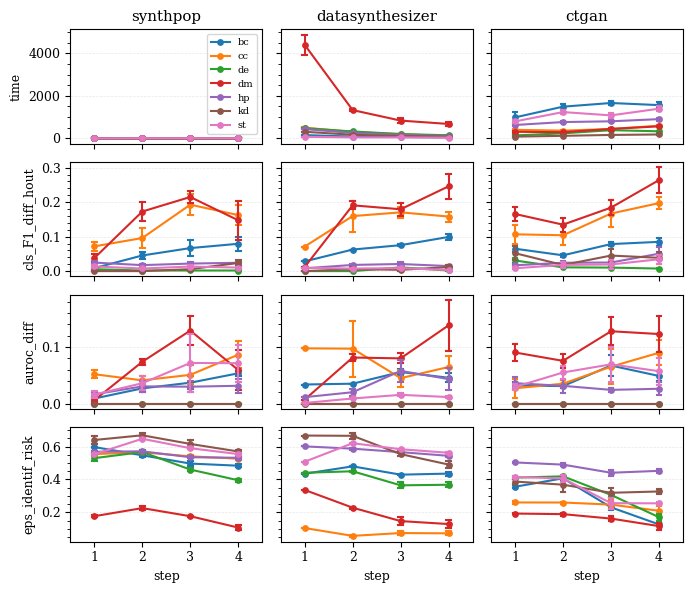

In [8]:
models = ['synthpop', 'datasynthesizer', 'ctgan']
metrics = ['time', 'cls_F1_diff_hout', 'auroc_diff', 'eps_identif_risk']

results = None
for model in models:
    res = pd.read_csv(f'experiments/results/time_privacy_utility_{model}.csv')
    if results is None:
        results = res
    else: results = pd.concat([results, res])

fig = time_privacy_and_utility_figure(results, models, metrics, return_flag=False)

In [ ]:
from itertools import product
from joblib import Parallel, delayed

NUM_REPS = 5

models = ['synthpop', 'datasynthesizer', 'ctgan']


STEPS = [1,2,3,4]
datasets = ['bc', 'cc', 'de', 'dm', 'hp', 'kd', 'st']

product = list(product(datasets, STEPS))

def part_to_be_repeated(index, model, data_name, step, train_data, test_data, target_var, dgms_strategy, multiplier=3):

    syn_data = {}
    for _ in range(NUM_REPS):
        if step == 1:
            df_syn = generate_synthetic_data(train_data, model, index*100)
            syn_data[_] = df_syn
        else:
            dgms_strategy.max_size = len(train_data)
            dgms = DisjointGenerativeModels(train_data, step*[model], joining_strategy = dgms_strategy, worker_id=index*100)
            dgms.join_multiplier = multiplier # Needed for acceptable amount of result from diabetic_mellitus dataset   
            df_dgms = dgms.fit_generate()

            syn_data[_] = df_dgms

    SE = SynthEval(train_data, test_data, verbose=False)
    res, _ = SE.benchmark(syn_data, analysis_target_var=target_var, **metrics, rank_strategy='normal')

    # get best result
    best_result = res['rank'].idxmax()

    out_results = {}
    out_results['model'] = model
    out_results['data'] = data_name
    out_results['step'] = step

    res = res.loc[best_result]
    out_results['corr_mat_diff'] = res['corr_mat_diff']['value'].tolist()
    out_results['auroc'] = res['auroc']['value'].tolist()
    out_results['cls_F1_diff'] = res['cls_F1_diff']['value'].tolist()
    out_results['cls_F1_diff_hout'] = res['cls_F1_diff_hout']['value'].tolist()
    out_results['eps_identif_risk'] = res['eps_identif_risk']['value'].tolist()
    out_results['priv_loss_eps'] = res['priv_loss_eps']['value'].tolist()
    out_results['mia_cls_risk'] = res['mia_cls_risk']['value'].tolist()
    out_results['utility'] = res['u_rank'].tolist()
    out_results['privacy'] = res['p_rank'].tolist()

    return out_results

res = Parallel(n_jobs=6)(delayed(part_to_be_repeated)(index, model, data_name, step, train_data[data_name], test_data[data_name], target_vars[data_name], JS, 3) for index, (data_name, step) in enumerate(product))
